# TODO:
- other ordination techniques (ordinate.R)
- **DONE** PCA within biome, color by project ID
- **DONE** pca plot into a function (plots.py)
- **DONE** color taxon PCA plot by e.g. phylum, order (more work - need to break down the tax names)
- **WONT** log transform by a log with a larger base? (-> scaling solved the weird structure in PCA plots)
- inspect correlations == 1
- inspect NaNs in tax_corr.describe()

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
sns.set(color_codes=True)
sns.set(style="white")
#sns.set(font="monospace")

pd.options.display.width = 1000
pd.options.display.max_colwidth = 150
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:76% !important; }</style>"))

from pairwise import *
from preprocess import *
from dimensionality_reduction import *
from ebi_summarize_data import check_df
from toolbox import mapp, restore_keywords_from_metadata
from metadata_keywords import binarize_keyword_metadata
from plots import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/perza/.local/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in library(setwidth) : there is no package called ‘setwidth’

  warnings.warn(x, RRuntimeWarning)


In [2]:
md = pd.read_csv('/D/ebi/DEFAULT_METADATA.tsv', sep="\t", index_col=False)
tax_md = pd.read_csv('/D/ebi/taxonomy_metadata.tsv', sep="\t", index_col=False)

/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
md.columns

In [3]:
Ai = pd.read_csv('/D/ebi/A_OTU-TSV_v2_Fecal.tsv', sep="\t", index_col=0)

In [4]:
A_fulli = pd.read_csv('/D/ebi/A_OTU-TSV_v2.tsv', sep="\t", index_col = 0)

In [5]:
#A = log_transform_counts(Ai)
A = correspondence_analysis_transform(Ai)

May not be correctly implemented


In [6]:
#A_full = log_transform_counts(A_fulli)
A_full = correspondence_analysis_transform(A_fulli)

May not be correctly implemented


Log transformation helps a little to even out the distribution of data, but the table below shows that still the 25th percentile is always (?) equal to 0.
- QST: would transforming by some other base logarithm help?

In [49]:
A.describe()

k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__; s__  k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__  k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__SCA1145  k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__SCA1170  k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__gargensis  k__Archaea; p__Euryarchaeota; c__Halobacteria; o__Halobacteriales; f__Halobacteriaceae; g__; s__  k__Archaea; p__Euryarchaeota; c__Halobacteria; o__Halobacteriales; f__Halobacteriaceae; g__Halalkalicoccus; s__jeotgali  k__Archaea; p__Euryarchaeota; c__Halobacteria; o__Halobacteriales; f__Halobacteriaceae; g__Halococcus; s__  \
count                                                                                             4116.000000                                                                                                                      4116.000000                                                                                                                             4116.000000                                                                                                                             4116.000000                                                                                                                               4116.000000                                                                                       4116.000000                                                                                                              4116.000000                                                                                                 4116.000000   
mean                                                                                                 0.000195                                                                                                                         0.000307                                                                                                                                0.000247                                                                                                                                0.000041                                                                                                                                  0.000022                                                                                          0.000007                                                                                                                 0.000010                                                                                                    0.000005   
std                                                                                                  0.011402                                                                                                                         0.016365                                                                                                                                0.006803                                                                                                                                0.001405                                                                                                                                  0.001113                                                                                          0.000458                                                                                                                 0.000641                                                                                                    0.000345   
min                                                                                        

# Distances between taxons

In [7]:
tax_dist = pd.DataFrame(pairwise_distances(A.T), columns = A.columns, index = A.columns)

In [8]:
tax_dist_long = tax_dist.stack().reset_index()
tax_dist_long.columns = ["taxon1", "taxon2", "distance"]

In [9]:
tax_dist_long.head()

taxon1                                                                                                                                    taxon2  distance
0  k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__; s__                                    k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__; s__  0.000000
1  k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__; s__           k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__  0.989311
2  k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__; s__    k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__SCA1145  3.422294
3  k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__; s__    k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__SCA1170  2.753871
4  k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__; s__  k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__gargensis  2.065676

# Correlations between taxons

In [10]:
tax_corr = A.corr() # of columns

In [26]:
tax_corr_long = tax_corr.stack().reset_index()
tax_corr_long.columns = ['taxon1', 'taxon2', "Pearson's correlation"]
tax_corr_long = tax_corr_long[tax_corr_long['taxon1'] != tax_corr_long['taxon2']]

In [518]:
tax_corr.describe()

k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__; s__  k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__  k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__SCA1145  k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__SCA1170  k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Nitrososphaerales; f__Nitrososphaeraceae; g__Candidatus Nitrososphaera; s__gargensis  k__Archaea; p__Euryarchaeota; c__Halobacteria; o__Halobacteriales; f__Halobacteriaceae; g__; s__  k__Archaea; p__Euryarchaeota; c__Halobacteria; o__Halobacteriales; f__Halobacteriaceae; g__Halalkalicoccus; s__jeotgali  k__Archaea; p__Euryarchaeota; c__Halobacteria; o__Halobacteriales; f__Halobacteriaceae; g__Halococcus; s__  \
count                                                                                             1960.000000                                                                                                                      1960.000000                                                                                                                             1960.000000                                                                                                                             1960.000000                                                                                                                               1960.000000                                                                                               0.0                                                                                                                      0.0                                                                                                         0.0   
mean                                                                                                 0.009849                                                                                                                         0.008801                                                                                                                                0.009583                                                                                                                               -0.001217                                                                                                                                  0.001474                                                                                               NaN                                                                                                                      NaN                                                                                                         NaN   
std                                                                                                  0.059570                                                                                                                         0.056365                                                                                                                                0.044271                                                                                                                                0.027565                                                                                                                                  0.028971                                                                                               NaN                                                                                                                      NaN                                                                                                         NaN   
min                                                                                        

Why are there NaNs in describe()? There aren't any zero-count-sum taxons...

In [511]:
print(round(float(tax_corr_long[["Pearson's correlation"]].max()), 2))
print(round(float(tax_corr_long[["Pearson's correlation"]].min()), 2))

tax_corr_long.sort_values("Pearson's correlation").drop_duplicates().head()

1.0
-0.51


taxon1                                                                                                                taxon2  Pearson's correlation
1455255                  k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Enterococcaceae; g__Enterococcus; s__                 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__Ruminococcus; s__              -0.510332
1833342                 k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__Ruminococcus; s__                  k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Enterococcaceae; g__Enterococcus; s__              -0.510332
1447411              k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Carnobacteriaceae; g__Granulicatella; s__  k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__Faecalibacterium; s__prausnitzii              -0.502290
1825498  k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__Faecalibacterium; s__prausnitzii              k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Carnobacteriaceae; g__Granulicatella; s__              -0.502290
1447338              k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Carnobacteriaceae; g__Granulicatella; s__                      k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__Blautia; s__              -0.499936

In [ ]:
tax_corr_long.sort_values("Pearson's correlation").head()

# Mutual information. Binarize the data?

In [7]:
tax_mi = mutual_information(Ai)
#tax_mi2 = mutual_information(A)
#sam_mi = mutual_information(Ai, axis=1)
#sam_mi2 = mutual_information(A, axis=1)

KeyboardInterrupt: 

# Summarize pairwise data

In [ ]:
# make a table with a overlapping, correlation, eicl distance, mi, p-val from glm

In [ ]:
summ_pairwise = pd.merge(n_overlapping(A), tax_dist_long, )

# PCA and clustering

### taxons

In [42]:
use_df_t = A # Fecal!
use_df_t = scale(use_df_t, axis='both')
pca_t = PCA(n_components=10)
pca_t.fit(use_df_t)

TypeError: tuple indices must be integers or slices, not str

In [461]:
x_t = mapp(tax_md, index_col='taxonomy', cols=['phylum', 'class', 'order'])
comps_t = pd.DataFrame(pca_t.components_[:2,:].T, index = use_df_t.columns, columns = ['PC1', 'PC2'])
comps_t = pd.merge(comps_t, x_t, how="inner", left_index=True, right_index=True)

n points 2600
65 phyla


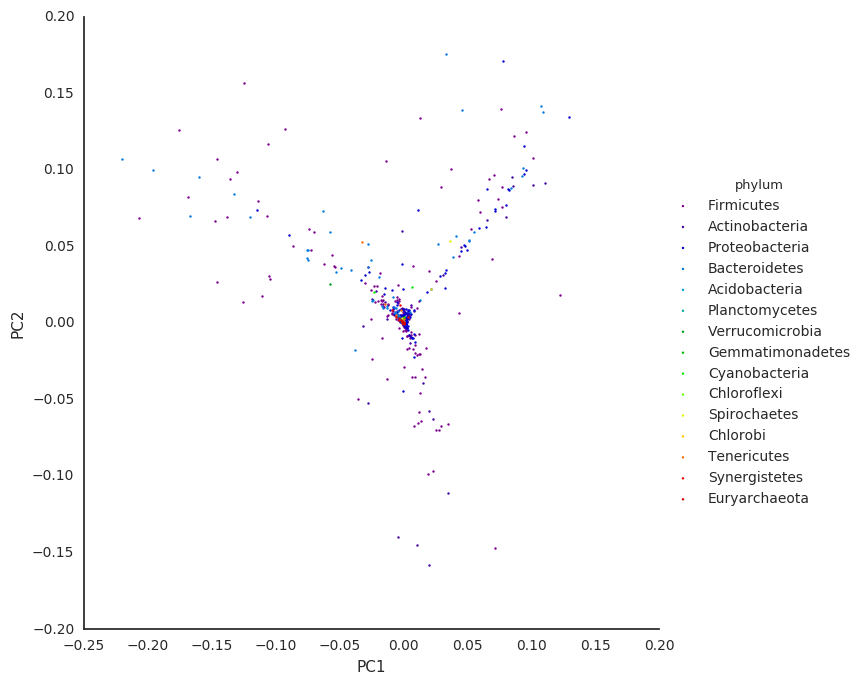

In [462]:
print("n points", comps_t.shape[0])
print(len(comps_t.phylum.drop_duplicates()), "phyla") # plotted out of", x5, "for", plot_biomes2)

plot_pca(pca_t, use_df_t.T, tax_md, mapp_index_col='taxonomy', color_by='phylum', plot_subset=15)

(-0.001, 0.001)

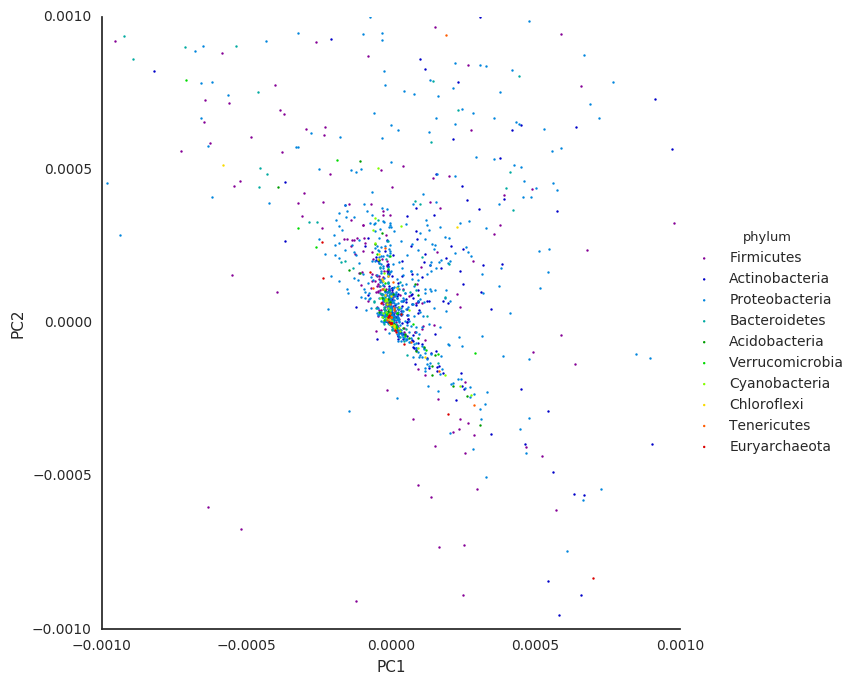

In [463]:
p2 = plot_pca(pca_t, use_df_t.T, tax_md, mapp_index_col='taxonomy', color_by='phylum', plot_subset=10)

p2.axes[0,0].set_ylim(-0.001,0.001)
p2.axes[0,0].set_xlim(-0.001,0.001)

(-0.001, 0.001)

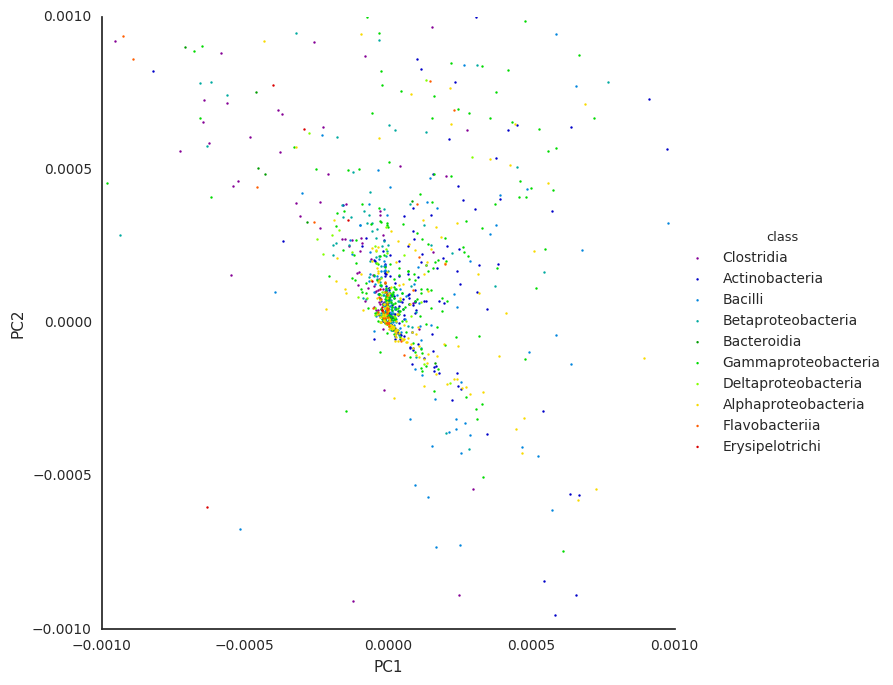

In [470]:
p2 = plot_pca(pca_t, use_df_t.T, tax_md, mapp_index_col='taxonomy', color_by='class', plot_subset=10)

p2.axes[0,0].set_ylim(-0.001,0.001)
p2.axes[0,0].set_xlim(-0.001,0.001)

In [467]:
print("10 components explain only", sum(pca_t.explained_variance_ratio_), "of variance!")

10 components explain only 0.647226857785 of variance!


### MI - taxons

In [19]:
MI_tax = pd.read_csv('/P/metag/data/MI_Fecal_tax.csv', sep='\t', index_col=0)
MI_tax_bin= pd.read_csv('/P/metag/data/MI_Fecal_tax_bin.csv', sep='\t', index_col=0)

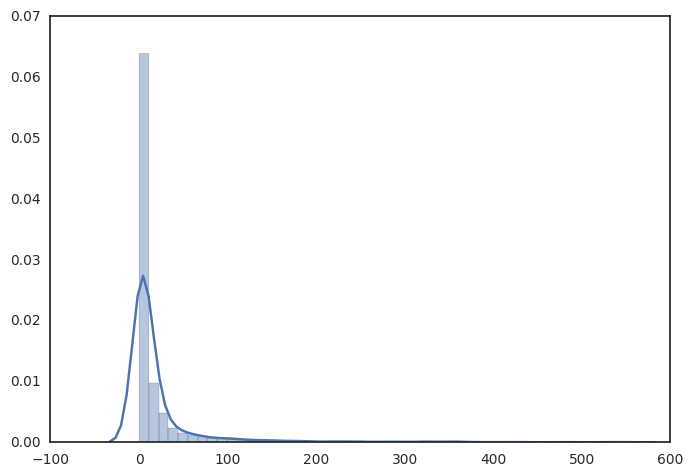

In [21]:
sns.distplot(MI_tax.sum())

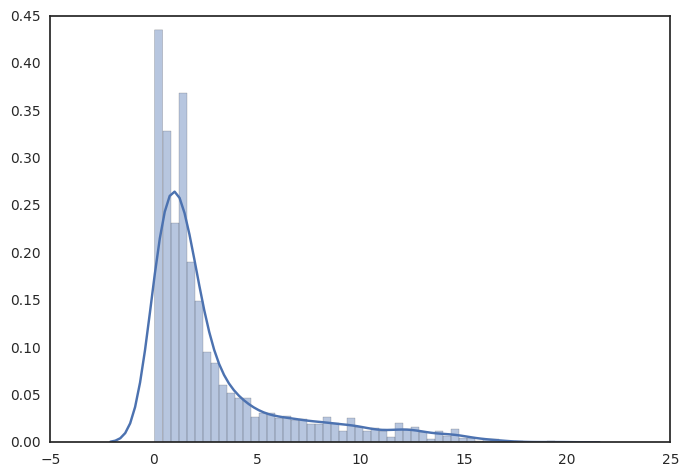

In [22]:
sns.distplot(MI_tax_bin.sum())

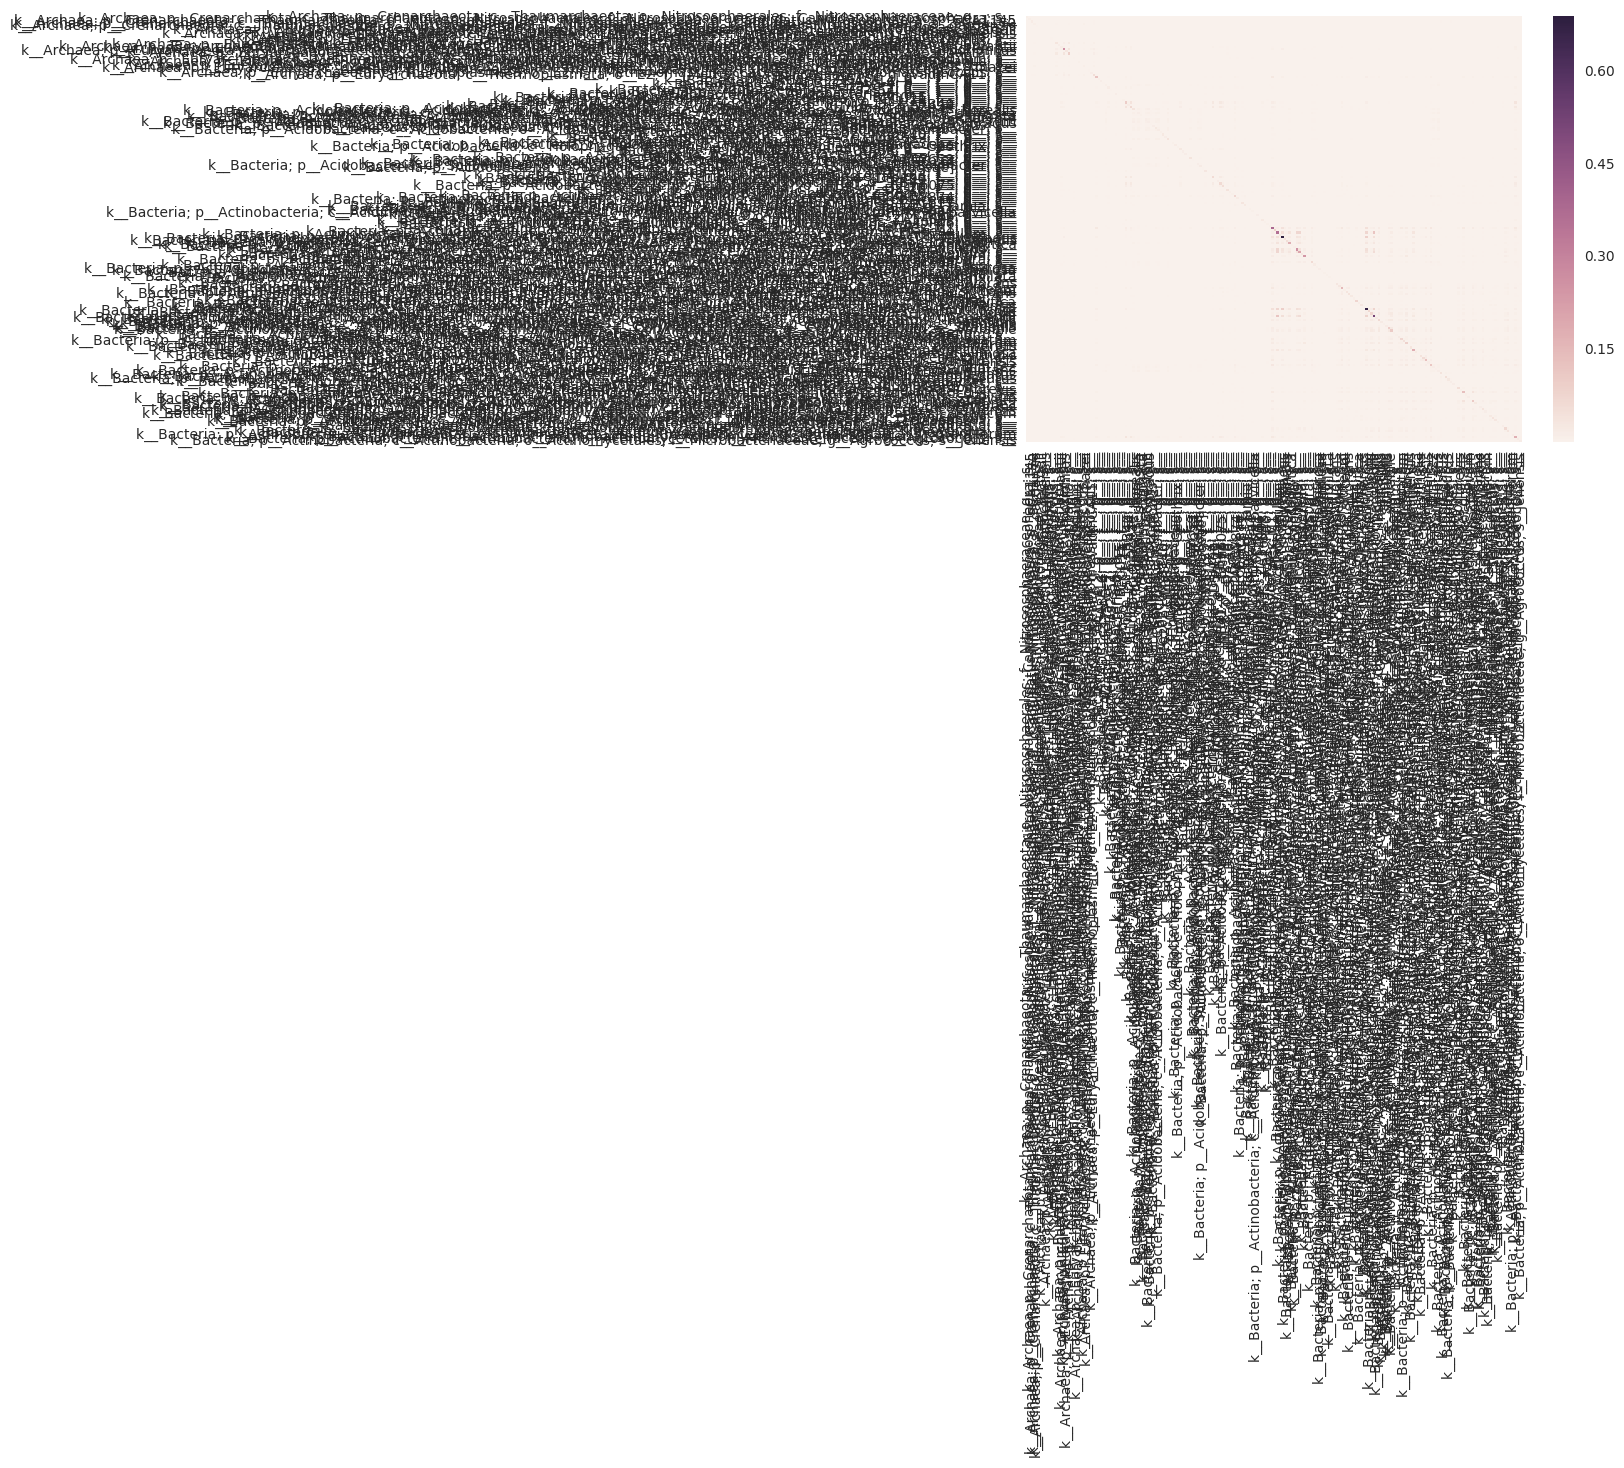

In [23]:
sns.heatmap(MI_tax_bin.ix[:200, :200])

The taxonomic units don't seem to cluster in an expected way. 

### samples

In [89]:
use_df_s = A_full

In [522]:
pca_s = PCA(n_components=10)
pca_s.fit(use_df_s.T)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

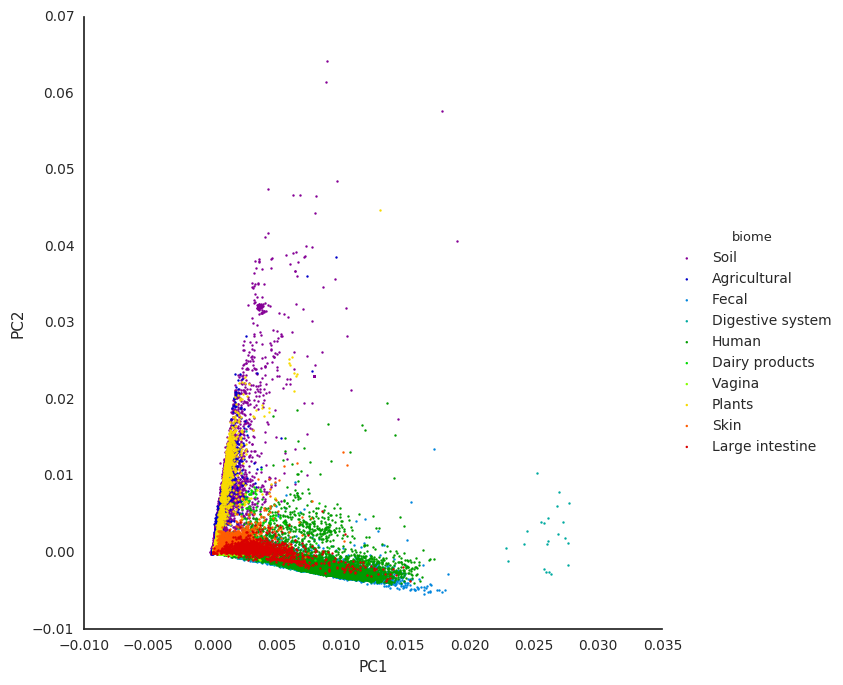

In [528]:
p3 = plot_pca(pca_s, use_df_s, md, mapp_index_col='sample_id', color_by='biome', plot_subset=10)

In [69]:
x_s = mapp(md, index_col='sample_id', cols=['biome', 'project_id'])

In [409]:
comps_s = pd.DataFrame(pca_s.components_[:2,:].T, index = use_df_s.index, columns = ['PC1', 'PC2'])
comps_s = pd.merge(comps_s, x_s, how="inner", left_index=True, right_index=True)

In [410]:
# plot only the most common
plot_biomes = ['Fecal', 'Human', 'Soil', 'Digestive System', 'Vagina', # top 5
               'Skin', 'Large Intestine', "Plants", "Agricultural", "Activated Sludge", # top 10
#"Dairy products",
#"Fungi",
#"Forest soil",
#"Rumen",
#"Contaminated",
#"Oral", # over 1000 counts
]

plot_comps_s = comps_s.ix[
    comps_s['biome'].apply(
        lambda x: x in plot_biomes
        ),:]



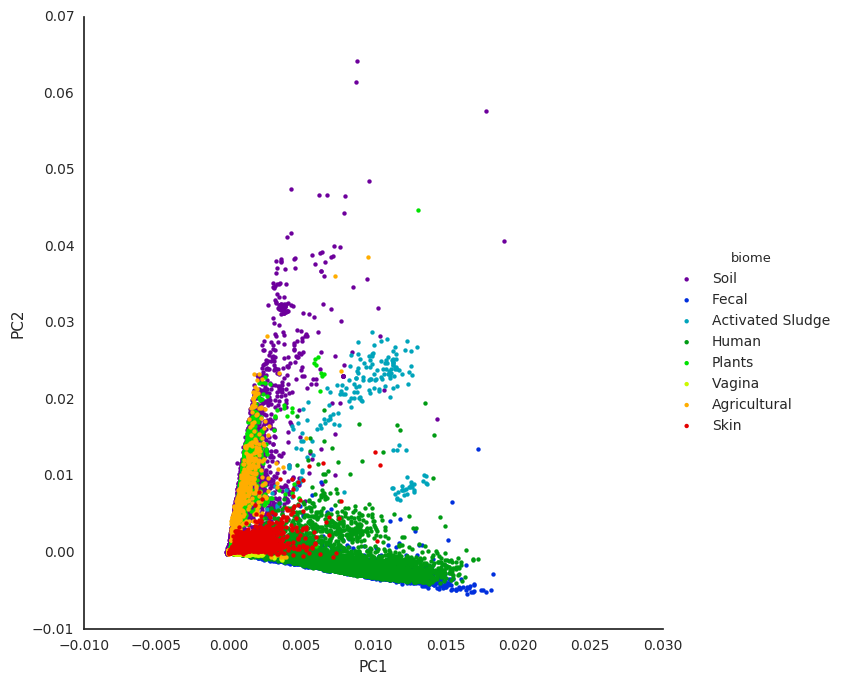

In [527]:
p3 = sns.lmplot(x="PC1", y="PC2", hue="biome", data=plot_comps_s,
           ci=None, palette="spectral", fit_reg=False, size=7, #col_wrap=2, 
           scatter_kws={"s": 10, "alpha": 1}
           )

In [472]:
print("10 components explain only", sum(pca_s.explained_variance_ratio_), "of variance!")

10 components explain only 0.59783536295 of variance!


Biomes seem to cluster either by PC1 or PC2 (rather than both). Clusters make sense, at least for the most abundant biomes: Soil clusters with Plants and Agricultural, Human (which may be mainly fecal samples actually) with Fecal, and Skin is sort of in between, which seems interesting.

**QST: There's a visible structure about the data - not sure why that is - perhaps counts (non-negative values) orlog transformation caused this?**

ANS: http://stats.stackexchange.com/a/35190/142668
First of all, you really do want to center the data. If not, the geometric interpretation of PCA shows that the first principal component will be close to the vector of means and all subsequent PCs will be orthogonal to it, which will prevent them from approximating any PCs that happen to be close to that first vector. We can hope that most of the later PCs will be approximately correct, but the value of that is questionable when it's likely the first several PCs--the most important ones--will be quite wrong.

In [ ]:
# try with scaling
#use_df_s_scale = pd_scale(use_df_s.T, axis="both", method="scale")
use_df_s_scale = scale(use_df_s.T, axis=1, method="scale")

In [621]:
pca_s_scale = PCA(n_components=10)
pca_s_scale.fit(use_df_s_scale)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

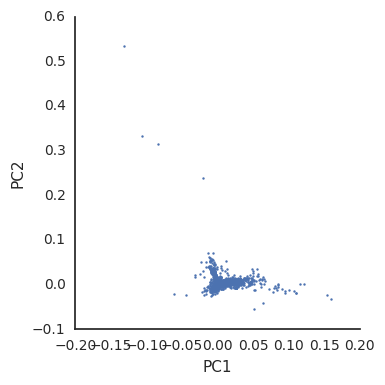

In [623]:
p12 = plot_quick_pca(pca_s_scale, use_df_s_scale.T, md)

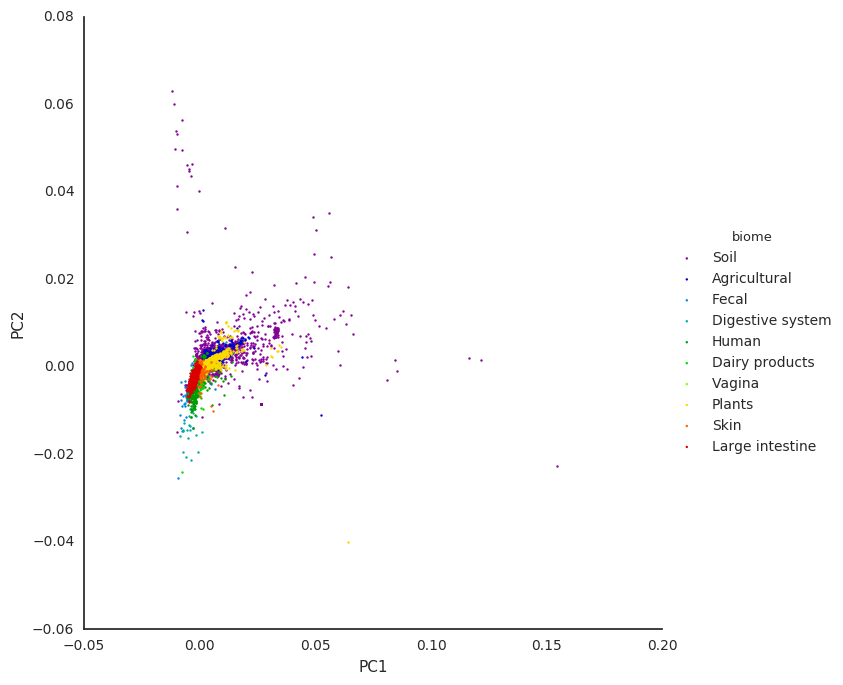

In [624]:
p10 = plot_pca(pca_s_scale, use_df_s_scale.T, md, mapp_index_col='sample_id', color_by='biome', plot_subset=10)

### Plot Fecal

In [609]:
comps_s_scale = pd.DataFrame(pca_s_scale.components_[:2,:].T, index = use_df_s.index, columns = ['PC1', 'PC2'])
comps_s_scale = pd.merge(comps_s_scale, x_s, how="inner", left_index=True, right_index=True)

7 projects plotted out of 31 for ['Fecal']


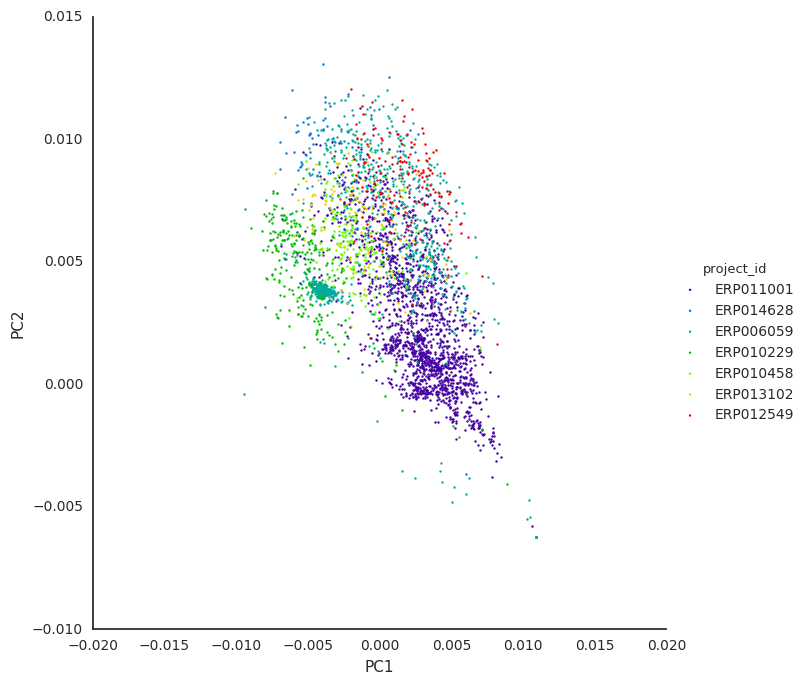

In [610]:
plot_biomes2 = ['Fecal']
#plot_biomes2 = plot_biomes
plot_comps_s2 = comps_s_scale.ix[
    comps_s_scale.biome.apply(
        lambda x: x in plot_biomes2
        ),:]

# subset most abundant projects
count_threshold = 75

x5 = len(plot_comps_s2.project_id.drop_duplicates())
plot_projects2=(plot_comps_s2.groupby('project_id').count() > count_threshold).PC1
plot_projects2 = plot_projects2[plot_projects2].index

plot_comps_s2 = comps_s_scale.ix[
    comps_s_scale.project_id.apply(
        lambda x: x in plot_projects2
        ),:]
print(len(plot_comps_s2.project_id.drop_duplicates()), "projects plotted out of", x5, "for", plot_biomes2)


p3 = sns.lmplot(x="PC1", y="PC2", hue="project_id", data=plot_comps_s2,
           ci=None, palette="spectral", fit_reg=False, size=7, #col_wrap=2, 
           scatter_kws={"s": 3, "alpha": 1}
           )

### Different dimensionality reduction

In [ ]:
use_df_r = scale_sklearn(A_fulli, axis='both', method="scale")

In [ ]:
rcomps_s, rvar_explained = Rpca(use_df_r)
plot_rcomps_s= pd.merge(rcomps_s, x_s, how="inner", left_index=True, right_index=True)


In [97]:
rdeco = Rdecorana(Ai) # decorana works with count matrices

In [ ]:

#p3 = plot_pca(plot_rcomps_s, Ai, md, mapp_index_col='sample_id', color_by='project_id', plot_subset='Fecal')

p3 = sns.lmplot(x="PC1", y="PC2", hue="project_id", data=plot_rcomps_s,
           ci=None, palette="spectral", fit_reg=False, size=7, #col_wrap=2, 
           scatter_kws={"s": 10, "alpha": 1}
           )

# Gutplot!

1. Look into keywords - are they not too much separated? How do they interact, what are the intersections?

In [32]:
kw = binarize_keyword_metadata(md)

In [34]:
print(restore_keywords_from_metadata(md))

['sand', 'protozoa', 'vertebrate', 'oil', 'fermentation', 'beach', 'rat', 'animal', 'disease', 'non-tumor', 'porifera', 'wetland', 'saline', 'contaminated', 'infant', 'bioremediation', 'obesity', 'chlorophyll', 'water', 'grassland', 'rectum', 'synthetic', 'mammal', 'fungi', 'crohn', 'seal', 'cave', 'agricultural', 'hiv', 'desert', 'modeled', 'bird', 'diagnostic', 'american', 'human', 'nasal', 'brain', 'crop', 'control', 'estuary', 'simulated', 'lentic', 'vaginal', 'annelida', 'positive', 'tropical', 'bat', 'coprolite', 'cattle', 'freshwater', 'intertidal', 'asthma', 'permafrost', 'rumen', 'mine', 'patient', 'food', 'adult', 'intestine', 'boreal', 'rhizosphere', 'thermal', 'groundwater', 'renal', 'soil', 'cecum', 'marsh', 'insect', 'sediment', 'beech', 'host-associated', 'infection', 'reef', 'spiralia', 'lean', 'vagina', 'silt', 'uranium', 'lotic', 'bioreactor', 'forest', 'hydrogen', 'negative', 'drinking', 'marine', 'skin', 'springs', 'stroke', 'circulatory', 'lung', 'rock-dwelling', '

Connected keywords: ( 48 ) ['adult', 'american', 'animal', 'antibiotic', 'bioreactor', 'cattle', 'cecum', 'control', 'crohn', 'diabetes', 'diagnostic', 'disease', 'fermentation', 'food', 'fungi', 'host-associated', 'human', 'hydrogen', 'infant', 'infection', 'insect', 'intestine', 'lean', 'mammal', 'marine', 'mouse', 'nasal', 'negative', 'obesity', 'oil', 'oral', 'patient', 'positive', 'rat', 'rectum', 'renal', 'rhizosphere', 'rumen', 'saline', 'sand', 'sheep', 'skin', 'soil', 'stroke', 'vagina', 'vaginal', 'vertebrate', 'water']


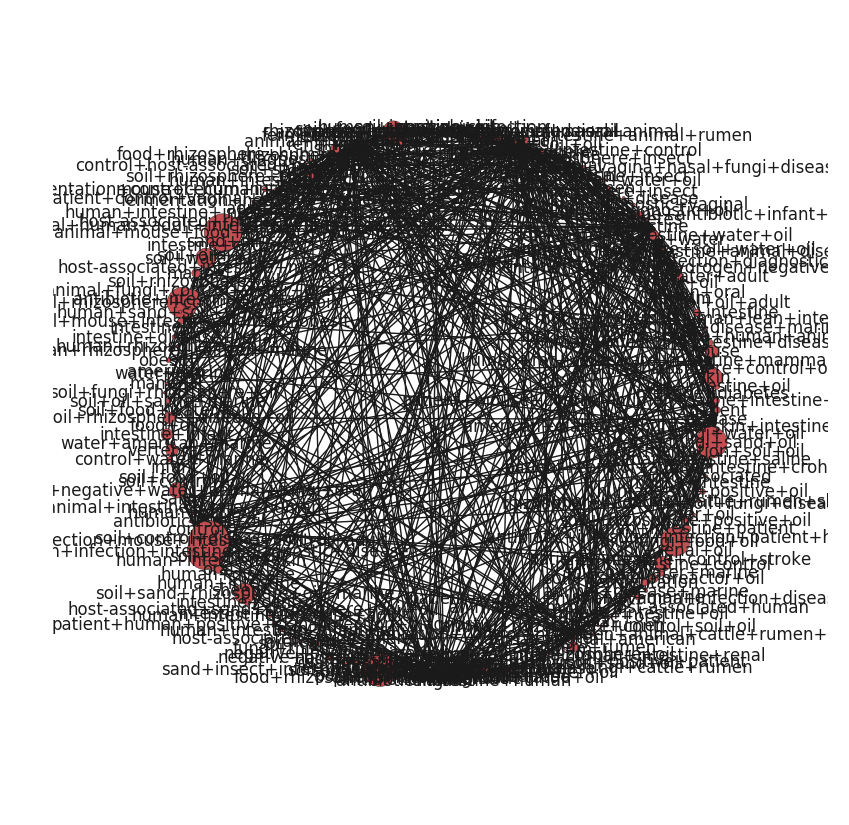

In [27]:
show_intersections(kw, ['intestine'], figsize=10, scale_factor=10)

Intersecting keywords: ( 5 ) ['animal', 'cattle', 'intestine', 'rumen', 'sheep']


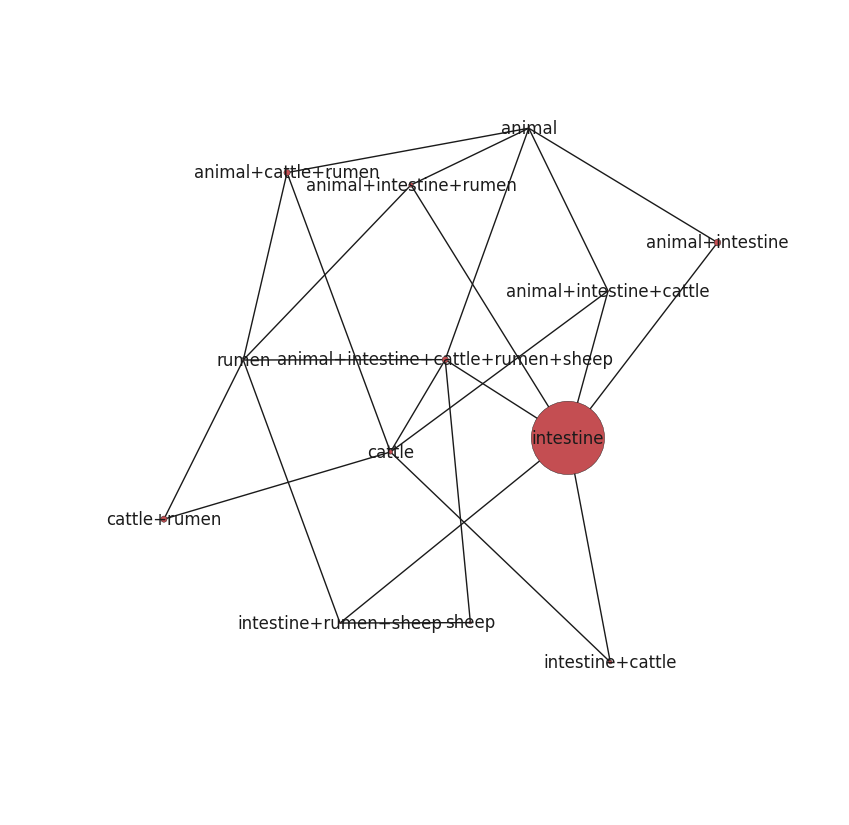

In [39]:
show_intersections(kw, ['sheep'], figsize=10, scale_factor=10, circular=False)

In [26]:
# Sorta connected, I guess... plot gut PCA and colour by keyword